# Credit Fraud Detection



# 1. Importing relevant libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from collections import Counter

sns.set()
%matplotlib inline

# 2. Loading raw data

In [7]:
df_raw = pd.read_csv('creditcard.csv')

# 3. EDA

In [8]:
df_raw.describe(include='all')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
# Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.
# It looks like unimportant. We'll drop that.

df=df_raw.drop(['Time'], axis=1)

In [10]:
df.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [11]:
df.shape

(284807, 30)

In [12]:
df.isnull().sum()

,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0
V10,0


In [13]:
# We have no null values

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

In [15]:
# All categories are numerical (except target 'Class' which is boolean)

In [16]:
len(df[df['Class'] == 1])

492

In [17]:
len(df[df['Class'] == 0])

284315

In [18]:
# There is a huge disproportion in data. Only 0,17% is a fraud data.

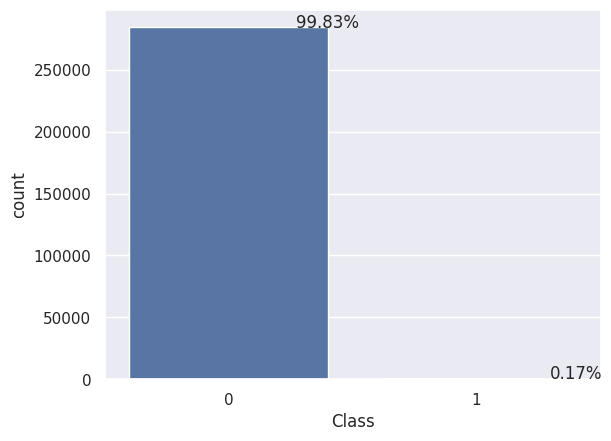

In [19]:
ax = sns.countplot(x='Class',data=df)
total = float(len(df))
for p in ax.patches:
    percentage="{:.2f}%".format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha="center")
plt.show()

## Correlations and most important features

In [20]:
df.corr()['Class'].sort_values()

,Class
V17,-0.326481
V14,-0.302544
V12,-0.260593
V10,-0.216883
V16,-0.196539
V3,-0.192961
V7,-0.187257
V18,-0.111485
V1,-0.101347
V9,-0.097733


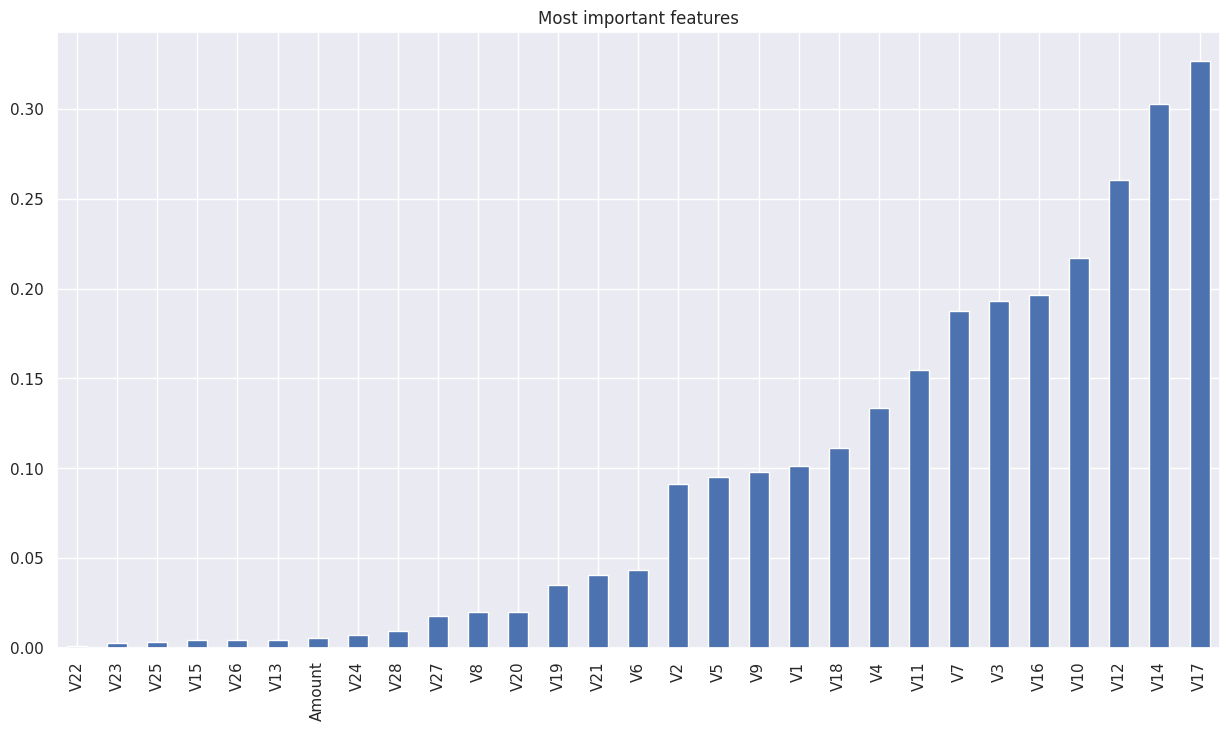

In [21]:
plt.figure(figsize=(15,8))
d = df.corr()['Class'][:-1].abs().sort_values().plot(kind='bar', title='Most important features')

plt.show()

In [22]:
# Let's peak all features with correlation 0.15 and morec =

c = df.corr()['Class'][:-1].abs() > 0.15

print (c)

V1        False
V2        False
V3         True
V4        False
V5        False
V6        False
V7         True
V8        False
V9        False
V10        True
V11        True
V12        True
V13       False
V14        True
V15       False
V16        True
V17        True
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Name: Class, dtype: bool


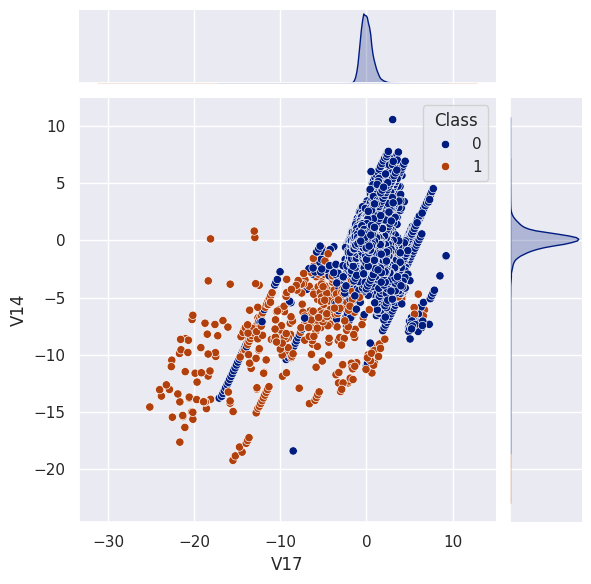

In [23]:
sns.jointplot(x='V17', y='V14',hue='Class', data=df, palette = 'dark')

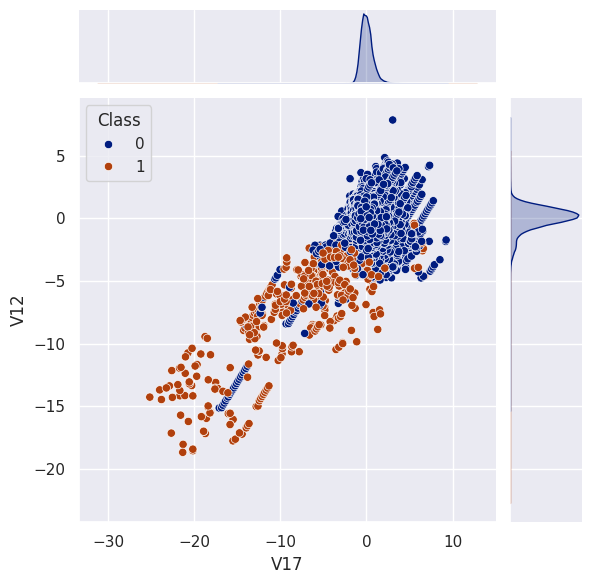

In [24]:
sns.jointplot(x='V17', y='V12',hue='Class', data=df, palette = 'dark')

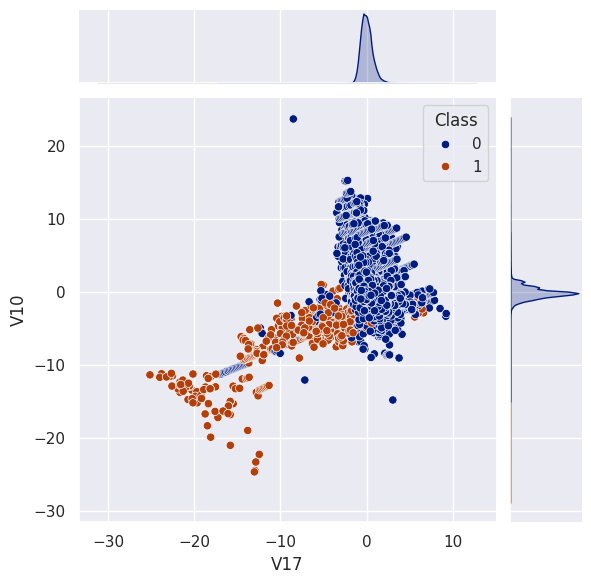

In [25]:
sns.jointplot(x='V17', y='V10',hue='Class', data=df, palette = 'dark')

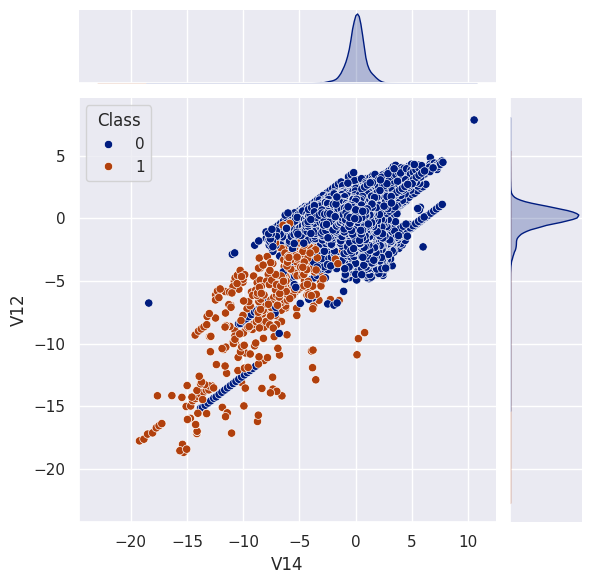

In [26]:
sns.jointplot(x='V14', y='V12',hue='Class', data=df, palette = 'dark')

# 4. Feature engineering

## Outlier detection

Let's check the distribution of the features with 0,13 and higher and correlation

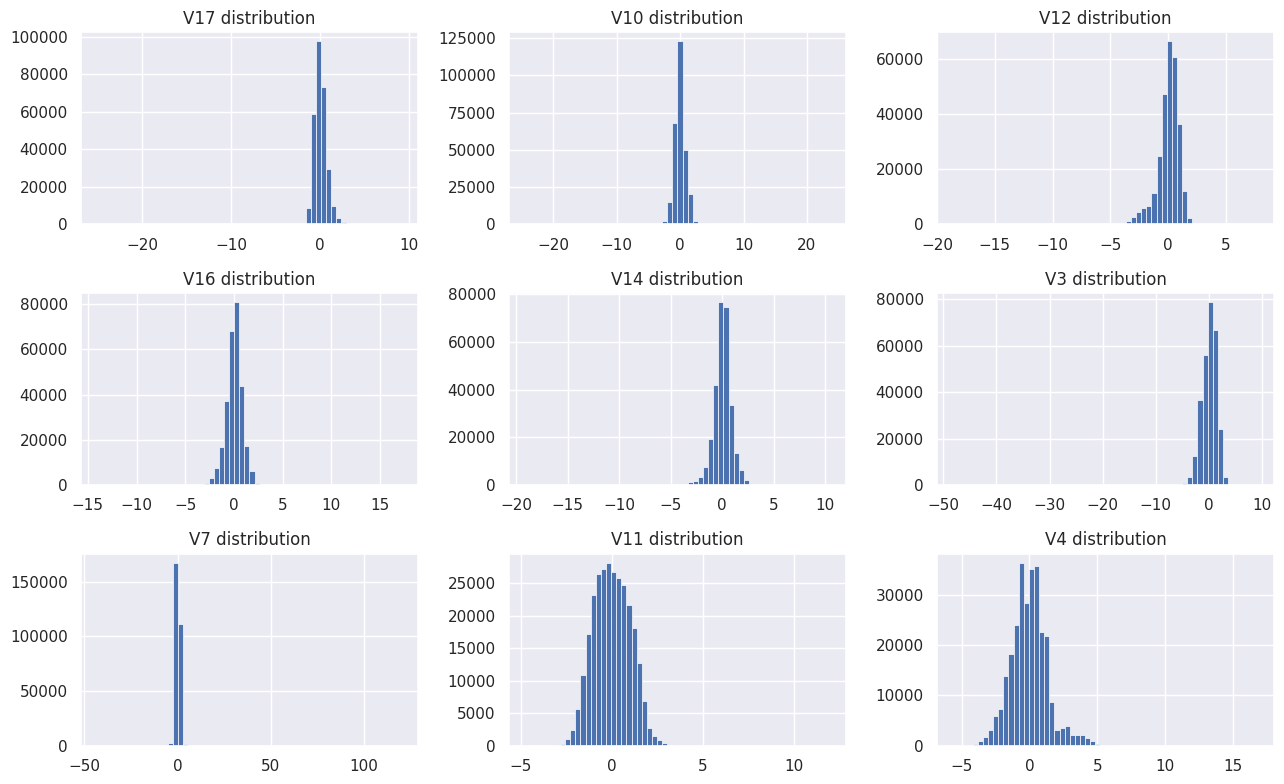

In [27]:
fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(13,8))

axes[0,0].hist(df['V17'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,0].set_title("V17 distribution");

axes[0,1].hist(df['V10'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,1].set_title("V10 distribution");

axes[0,2].hist(df['V12'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,2].set_title("V12 distribution");

axes[1,0].hist(df['V16'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,0].set_title("V16 distribution");

axes[1,1].hist(df['V14'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,1].set_title("V14 distribution");

axes[1,2].hist(df['V3'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,2].set_title("V3 distribution");

axes[2,0].hist(df['V7'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,0].set_title("V7 distribution");

axes[2,1].hist(df['V11'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,1].set_title("V11 distribution");

axes[2,2].hist(df['V4'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,2].set_title("V4 distribution");

plt.tight_layout()

It looks like we have a lot of outliers here. We can try to get rid of them.

## Tukey's IQR method

Tukey’s  (1977)  technique  is  used  to  detect  outliers  in  univariate  distributions  for symmetric as well as in slightly skewed data sets. The general rule is that anything not in the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier, and can be removed.

In [28]:
def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns an index list corresponding to the observations
    containing more than n outliers according to the Tukey IQR method.
    """
    outlier_indices = []

    # iterating over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1

        # outlier step
        outlier_step = 1.5 * IQR

        # Determining a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index

        # appending the found outlier indices for col to the list of outlier indices
        outlier_indices.extend(outlier_list_col)

    # selecting observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )

    return multiple_outliers

# detecting outliers
Outliers_IQR = detect_outliers(df,2,['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'])

# dropping outliers
df_out = df.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

In [29]:
len(Outliers_IQR)

47116

In [30]:
df_out

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
3,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
4,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237686,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,-0.657422,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
237687,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
237688,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
237689,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


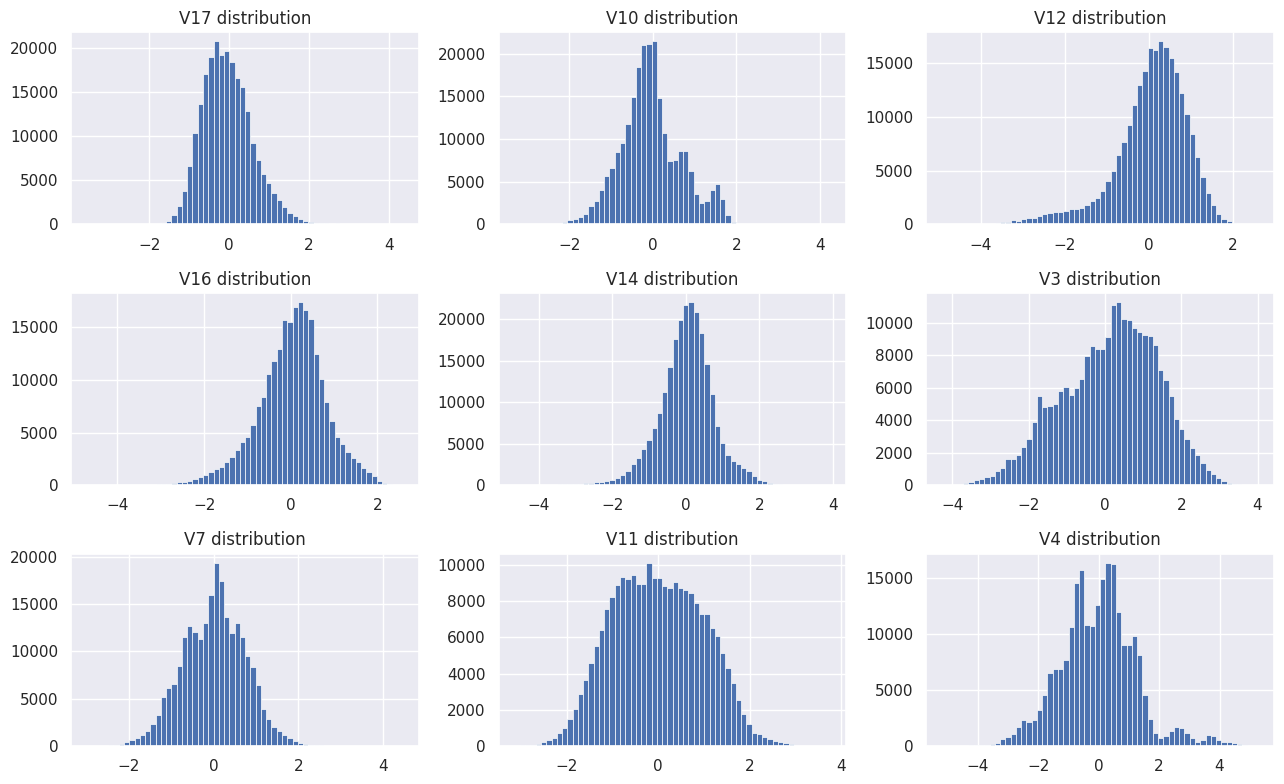

In [31]:
# Checking distributions of most important features after dropping outliers

fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(13,8))

axes[0,0].hist(df_out['V17'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,0].set_title("V17 distribution");

axes[0,1].hist(df_out['V10'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,1].set_title("V10 distribution");

axes[0,2].hist(df_out['V12'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,2].set_title("V12 distribution");

axes[1,0].hist(df_out['V16'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,0].set_title("V16 distribution");

axes[1,1].hist(df_out['V14'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,1].set_title("V14 distribution");

axes[1,2].hist(df_out['V3'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,2].set_title("V3 distribution");

axes[2,0].hist(df_out['V7'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,0].set_title("V7 distribution");

axes[2,1].hist(df_out['V11'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,1].set_title("V11 distribution");

axes[2,2].hist(df_out['V4'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,2].set_title("V4 distribution");

plt.tight_layout()

Now features look much more "normal"!

In [32]:
# Let's check if we didn't drop too many important information accidentally

In [33]:
print ('The amount of frauds in df before dropping outliers: ', len(df[df['Class'] == 1]))

The amount of frauds in df before dropping outliers:  492


In [34]:
print ('The amount of frauds in df afret dropping outliers: ', len(df_out[df_out['Class'] == 1]))

The amount of frauds in df afret dropping outliers:  43


It looks like outliers are very similar to fraud values and we dropped most of them!

Let's create a new df with dropped outliers only.

In [35]:
Outliers_df2 = df.loc[df.index[Outliers_IQR]]

In [36]:
len(Outliers_df2)

47116

In [37]:
Outliers_df2

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
18,-5.401258,-5.450148,1.186305,1.736239,3.049106,-1.763406,-1.559738,0.160842,1.233090,0.345173,...,-0.503600,0.984460,2.458589,0.042119,-0.481631,-0.621272,0.392053,0.949594,46.80,0
85,-4.575093,-4.429184,3.402585,0.903915,3.002224,-0.491078,-2.705393,0.666451,1.922216,-0.614312,...,-0.047365,0.853360,-0.971600,-0.114862,0.408300,-0.304576,0.547785,-0.456297,200.01,0
140,-5.101877,1.897022,-3.458034,-1.277543,-5.517758,2.098366,3.329603,1.250966,0.271501,-0.305483,...,-0.871744,-0.678879,-0.555900,-0.761660,0.066611,0.767227,0.731634,-0.860310,919.60,0
146,-5.285971,4.847323,-1.290368,-1.427842,-0.621533,-0.604691,0.437866,0.336384,3.558373,6.427802,...,-0.923604,-1.171187,0.150872,-0.493322,1.050554,0.194865,2.490503,1.575380,8.95,0
164,-6.093248,-12.114213,-5.694973,3.294389,-1.413792,4.776000,4.808426,-0.228197,-0.525896,-1.724899,...,2.228823,-2.264037,-3.553381,1.215279,-0.406073,-0.653384,-0.711222,0.672900,3828.04,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275573,-2.796570,-1.602426,0.553124,-0.972816,-0.090899,0.423694,0.037604,0.500683,-1.163213,-0.218494,...,-0.766574,-1.794549,-0.536869,0.233628,0.208626,-0.435249,0.509353,-0.512349,283.20,0
277296,-0.514141,0.949264,-1.164256,-0.687624,0.784550,1.162172,1.753924,-0.052698,0.015033,-0.785415,...,-0.209018,-0.107877,0.148562,-0.421933,-0.589293,0.238553,-0.676694,-0.584556,195.40,0
277581,-0.112954,0.944074,-2.352370,0.944593,0.767084,-0.491613,1.898752,0.062521,-1.224329,0.218670,...,0.714246,1.895837,0.441559,0.729273,-1.048663,-0.415093,0.407531,0.354169,197.72,0
280989,-0.303032,0.515443,-2.395964,-0.052680,0.454179,-1.607054,2.039611,-0.188682,-0.446324,-0.439347,...,0.671690,1.721186,0.444797,-0.004811,-1.012256,-0.141775,0.369032,0.314705,214.20,0


# 5. Modelling

## 1st data frame

In [38]:
# Train/Test split

X = Outliers_df2.drop('Class',axis=1).values
y = Outliers_df2['Class'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [39]:
# Scaling data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [40]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [42]:
X_train.shape

(35337, 29)

In [43]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=29,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=14,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(units=7,activation='relu'))
#model.add(Dropout(0.1))

model.add(Dense(units=2,activation='relu'))

model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

In [44]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=2, patience=35)

In [46]:
model.fit(x=X_train,
          y=y_train,
          epochs=3000,
          validation_data=(X_test, y_test), verbose=2,
          callbacks=[early_stop]
          )

Epoch 1/3000
1105/1105 - 3s - 3ms/step - loss: 0.0120 - val_loss: 0.0107
Epoch 2/3000
1105/1105 - 2s - 2ms/step - loss: 0.0120 - val_loss: 0.0103
Epoch 3/3000
1105/1105 - 2s - 2ms/step - loss: 0.0123 - val_loss: 0.0103
Epoch 4/3000
1105/1105 - 3s - 2ms/step - loss: 0.0117 - val_loss: 0.0106
Epoch 5/3000
1105/1105 - 3s - 2ms/step - loss: 0.0119 - val_loss: 0.0130
Epoch 6/3000
1105/1105 - 3s - 3ms/step - loss: 0.0120 - val_loss: 0.0116
Epoch 7/3000
1105/1105 - 4s - 4ms/step - loss: 0.0121 - val_loss: 0.0105
Epoch 8/3000
1105/1105 - 3s - 2ms/step - loss: 0.0116 - val_loss: 0.0109
Epoch 9/3000
1105/1105 - 2s - 2ms/step - loss: 0.0118 - val_loss: 0.0103
Epoch 10/3000
1105/1105 - 4s - 4ms/step - loss: 0.0119 - val_loss: 0.0106
Epoch 11/3000
1105/1105 - 2s - 2ms/step - loss: 0.0120 - val_loss: 0.0106
Epoch 12/3000
1105/1105 - 2s - 2ms/step - loss: 0.0119 - val_loss: 0.0103
Epoch 13/3000
1105/1105 - 3s - 3ms/step - loss: 0.0119 - val_loss: 0.0116
Epoch 14/3000
1105/1105 - 2s - 2ms/step - loss:

<Axes: >

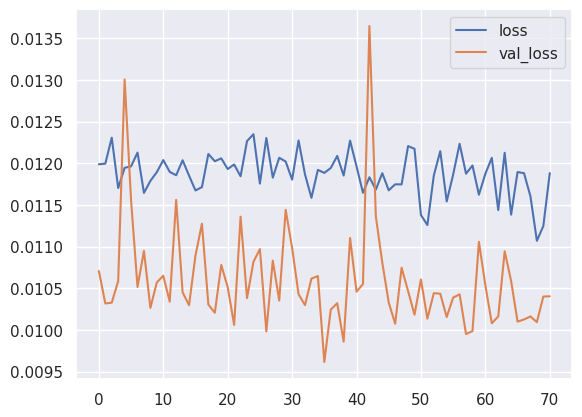

In [47]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [48]:
predictions = (model.predict(X_test) > 0.5)*1

369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [49]:
from sklearn.metrics import classification_report,confusion_matrix

In [50]:
# https://en.wikipedia.org/wiki/Precision_and_recall
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11668
           1       0.81      0.89      0.85       111

    accuracy                           1.00     11779
   macro avg       0.91      0.94      0.92     11779
weighted avg       1.00      1.00      1.00     11779



In [51]:
print(confusion_matrix(y_test,predictions))

[[11645    23]
 [   12    99]]


In [52]:
cm_df = pd.DataFrame(confusion_matrix(y_test,predictions))
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,11645,23
Actual 1,12,99


In [53]:
from sklearn.metrics import f1_score

In [54]:
f1 = f1_score(y_test, predictions)
print (f1)

0.8497854077253219


In [55]:
CM = confusion_matrix(y_test,predictions)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

In [56]:
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP)
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [57]:
ACC

0.9970286102385602

## 2nd data frame

In [58]:
# Train/Test split

X = df_out.drop('Class',axis=1).values
y = df_out['Class'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [59]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [60]:
X_train.shape

(178268, 29)

In [61]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=29,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=14,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(units=7,activation='relu'))
#model.add(Dropout(0.1))

model.add(Dense(units=2,activation='relu'))

model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

In [62]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=2, patience=35)

In [63]:
model.fit(x=X_train,
          y=y_train,
          epochs=3000,
          validation_data=(X_test, y_test), verbose=2,
          callbacks=[early_stop]
          )

Epoch 1/3000
5571/5571 - 15s - 3ms/step - loss: 0.0060 - val_loss: 0.0035
Epoch 2/3000
5571/5571 - 15s - 3ms/step - loss: 0.0020 - val_loss: 0.0030
Epoch 3/3000
5571/5571 - 19s - 3ms/step - loss: 0.0019 - val_loss: 0.0028
Epoch 4/3000
5571/5571 - 13s - 2ms/step - loss: 0.0018 - val_loss: 0.0026
Epoch 5/3000
5571/5571 - 13s - 2ms/step - loss: 0.0017 - val_loss: 0.0027
Epoch 6/3000
5571/5571 - 12s - 2ms/step - loss: 0.0017 - val_loss: 0.0027
Epoch 7/3000
5571/5571 - 20s - 4ms/step - loss: 0.0018 - val_loss: 0.0026
Epoch 8/3000
5571/5571 - 12s - 2ms/step - loss: 0.0016 - val_loss: 0.0025
Epoch 9/3000
5571/5571 - 21s - 4ms/step - loss: 0.0016 - val_loss: 0.0027
Epoch 10/3000
5571/5571 - 12s - 2ms/step - loss: 0.0016 - val_loss: 0.0029
Epoch 11/3000
5571/5571 - 11s - 2ms/step - loss: 0.0017 - val_loss: 0.0025
Epoch 12/3000
5571/5571 - 22s - 4ms/step - loss: 0.0016 - val_loss: 0.0025
Epoch 13/3000
5571/5571 - 12s - 2ms/step - loss: 0.0016 - val_loss: 0.0025
Epoch 14/3000
5571/5571 - 20s - 4m

<Axes: >

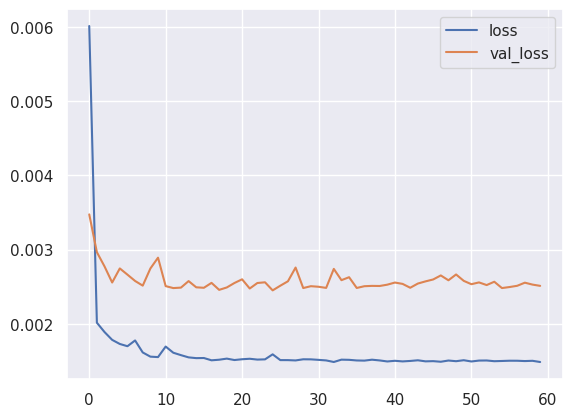

In [66]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [67]:
predictions_2nd = (model.predict(X_test) > 0.5)*1

1857/1857 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [68]:
# https://en.wikipedia.org/wiki/Precision_and_recall
print(classification_report(y_test,predictions_2nd))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59407
           1       0.00      0.00      0.00        16

    accuracy                           1.00     59423
   macro avg       0.50      0.50      0.50     59423
weighted avg       1.00      1.00      1.00     59423



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [69]:
print(confusion_matrix(y_test,predictions_2nd))

[[59407     0]
 [   16     0]]


In [70]:
cm_df = pd.DataFrame(confusion_matrix(y_test,predictions_2nd))
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,59407,0
Actual 1,16,0


In [71]:
CM = confusion_matrix(y_test,predictions_2nd)

TN_2nd = CM[0][0]
FN_2nd = CM[1][0]
TP_2nd = CM[1][1]
FP_2nd = CM[0][1]

In [72]:
# Sensitivity, hit rate, recall, or true positive rate
TPR_2nd = TP_2nd/(TP_2nd+FN_2nd)
# Specificity or true negative rate
TNR_2nd = TN_2nd/(TN_2nd+FP_2nd)
# Precision or positive predictive value
PPV_2nd = TP_2nd/(TP_2nd+FP_2nd)
# Negative predictive value
NPV_2nd = TN_2nd/(TN_2nd+FN_2nd)
# Fall out or false positive rate
FPR_2nd = FP_2nd/(FP_2nd+TN_2nd)
# False negative rate
FNR_2nd = FN_2nd/(TP_2nd+FN_2nd)
# False discovery rate
FDR_2nd = FP_2nd/(TP_2nd+FP_2nd)

# Overall accuracy
ACC_2nd = (TP_2nd+TN_2nd)/(TP_2nd+FP_2nd+FN_2nd+TN_2nd)

<ipython-input-72-2bcb0745b697>:6: RuntimeWarning: invalid value encountered in scalar divide
  PPV_2nd = TP_2nd/(TP_2nd+FP_2nd)
<ipython-input-72-2bcb0745b697>:14: RuntimeWarning: invalid value encountered in scalar divide
  FDR_2nd = FP_2nd/(TP_2nd+FP_2nd)


In [73]:
ACC_2nd

0.9997307439880181

In [74]:
f1_2nd = f1_score(y_test, predictions_2nd)
print (f1_2nd)

0.0


# 6. Combining results

In [75]:
# COmbining both confusion matrices

TN_final = TN + TN_2nd
FN_final = FN + FN_2nd
TP_final = TP + TP_2nd
FP_final = FP + FP_2nd

# Sensitivity, hit rate, recall, or true positive rate
TPR_final = TP_final/(TP_final+FN_final)

# Precision or positive predictive value
PPV_final = TP_final/(TP_final+FP_final)

# Overall accuracy
ACC_final = (TP_final+TN_final)/(TP_final+FP_final+FN_final+TN_final)

F1_score = 2*((PPV_final*TPR_final)/(PPV_final+TPR_final))

In [76]:
cm_df = pd.DataFrame(np.array([[TN_final, FP_final], [FN_final, TP_final]]), columns=['Predicted 0', 'Predicted 1'])
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})

cm_df

,Predicted 0,Predicted 1
Actual 0,71052,23
Actual 1,28,99


Combined confusion matrix

In [77]:
print('Overall accuracy final score: ', ACC_final)

Overall accuracy final score:  0.999283727985169


In [78]:
print('Overall F1 final score: ', F1_score)

Overall F1 final score:  0.7951807228915663
